# ELM Impementation

## Import Statements

In [77]:
import os
import cv2
from hpelm import ELM
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, ConfusionMatrixDisplay

## Importing and Preprocessing Data

In [63]:
def load_and_preprocess_images(dataset_path, target_size=(227, 227)):
    images = []
    labels = []
    class_names = sorted(os.listdir(dataset_path))
    
    # Iterate over each subfolder (class) in the main dataset folder
    for class_name in class_names:
        class_folder = os.path.join(dataset_path, class_name)
        
        if os.path.isdir(class_folder):  # Ensure it's a folder
            for filename in os.listdir(class_folder):
                img_path = os.path.join(class_folder, filename)
                
                try:
                    # Load and preprocess image
                    img = Image.open(img_path)  # Skip RGB conversion
                    img = img.resize(target_size)  # Resize to target dimensions
                    img_array = np.array(img) / 255.0  # Normalize pixel values
                    flattened_images = img_array.reshape(227*227*3)
                    images.append(flattened_images)
                    labels.append(class_name)
                except Exception as e:
                    print(f"Error loading image {img_path}: {e}")

    # Convert lists to numpy arrays
    images = np.array(images, dtype=np.float32)
    
    # Perform one-hot encoding on labels
    label_binarizer = LabelBinarizer()
    labels_one_hot = label_binarizer.fit_transform(labels)
    
    return images, labels_one_hot, label_binarizer.classes_

## Data Shuffling

In [64]:
def shuffle_data(X, y):
    X, y = shuffle(X,y, random_state = 42)
    return np.array(X), np.array(y)

## Training Dataset

In [65]:
dataset_path = "C:\\DataSet\\DL Project\\Different Terrain Types Classification\\train" 
images_train, labels_one_hot_train, class_names_train = load_and_preprocess_images(dataset_path)
X_train, y_train = shuffle_data(images_train, labels_one_hot_train)

## ELM Model

In [67]:
# Define number of input neurons (e.g., 32x32 images with 3 channels: 32*32*3 = 3072)
input_neurons = 227*227*3 # For RGB images
output_neurons = 4  # Number of classes in your classification task

# Create the ELM model
elm_model = ELM(input_neurons, output_neurons, classification="c")

# Add hidden layer with a specific number of neurons
elm_model.add_neurons(10, "sigm")  # Add 1000 hidden neurons with sigmoid activation

## Training Model

In [68]:
elm_model.train(X_train, y_train)

## Accuracy

In [73]:
dataset_path = "C:\\DataSet\\DL Project\\Different Terrain Types Classification\\test" 
images_test, labels_one_hot_test, class_names_test = load_and_preprocess_images(dataset_path)
X_test, y_test = shuffle_data(images_test, labels_one_hot_test)
y_pred = elm_model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
print(f"The accuracy score is {accuracy_score(y_test, y_pred)}")

The accuracy score is 0.6604166666666667


## Classification Report

In [79]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.98      0.85       120
           1       0.69      0.72      0.70       120
           2       0.57      0.25      0.35       120
           3       0.58      0.69      0.63       120

    accuracy                           0.66       480
   macro avg       0.64      0.66      0.63       480
weighted avg       0.64      0.66      0.63       480



## Confusion Matrix

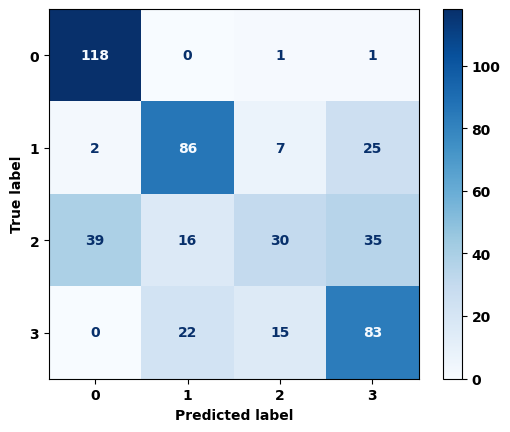

In [78]:
cm = confusion_matrix(y_test, y_pred)

display_labels = [0, 1, 2, 3]

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)

cm_display.plot(cmap='Blues')
plt.show()